#Task 3: Forest Cover Type Classification
I built forest cover type classification system using the Covertype dataset from UCI, focusing on predicting forest cover types based on a rich set of cartographic and environmental features. I cleaned and preprocessed the data, including handling categorical variables, trained and evaluated multiple multi-class classification models, and created insightful visualizations to assess performance. As a bonus, I compared different models (e.g., Random Forest vs. XGBoost) and performed hyperparameter tuning to optimize results.
###Covered topics: Multi-class classification, Tree-based modeling.

##Step 1: Import Libraries
I imported libraries for data handling, modeling, and visualization.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

##Step 2: Load and Extract Dataset
I uploaded covertype.zip dataset and extracted it to covertype_data, accessing covtype.data.gz. I loaded the gzip file into a DataFrame with UCI column names, using a comma delimiter to parse 55 columns, and verified the structure.

In [ ]:
import zipfile
import os
import pandas as pd
import gzip

# Extract the zip file
zip_file = "covertype.zip"
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall("covertype_data")

# Verify extracted files
print("Extracted files:", os.listdir("covertype_data"))

# Debug: Inspect raw content of the gz file (optional, run if needed)
# with gzip.open("covertype_data/covtype.data.gz", 'rt') as f:
#     for i, line in enumerate(f):
#         print(line.strip())
#         if i > 5: break

# Load the compressed data file with proper column names and comma delimiter
column_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
                'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
                'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
                'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
                'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
                'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
                'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
                'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']
data = pd.read_csv("covertype_data/covtype.data.gz", header=None, names=column_names,
                   sep=',', compression='gzip', engine='python')
print(data.head())
print(data.info())

Extracted files: ['covtype.info', 'old_covtype.info', 'covtype.data.gz']
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            

##Step 3: Clean and Preprocess Data
I split the data into features (X) and target (y, Cover_Type). Skipped scaling since int64 data suits tree models, but included an optional scaler for future use. Verified the split with sample outputs.

In [ ]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']
print(X.head())
print(y.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

##Step 4: Split Data and Train Models
I split data into 80% train and 20% test sets with a fixed seed. Trained a RandomForestClassifier on the training set and generated predictions for the test set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

##Step 5: Evaluate and Visualize
I generated a confusion matrix heatmap to compare predicted vs. actual cover types. Produced a classification report for metrics and plotted the top 10 feature importances.

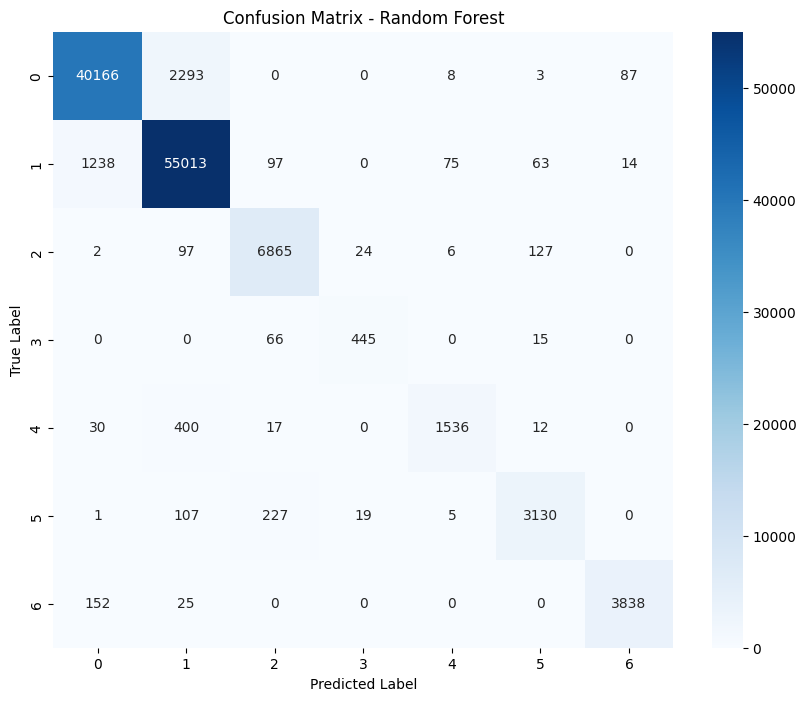

              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.93      0.90      0.92      3489
           7       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



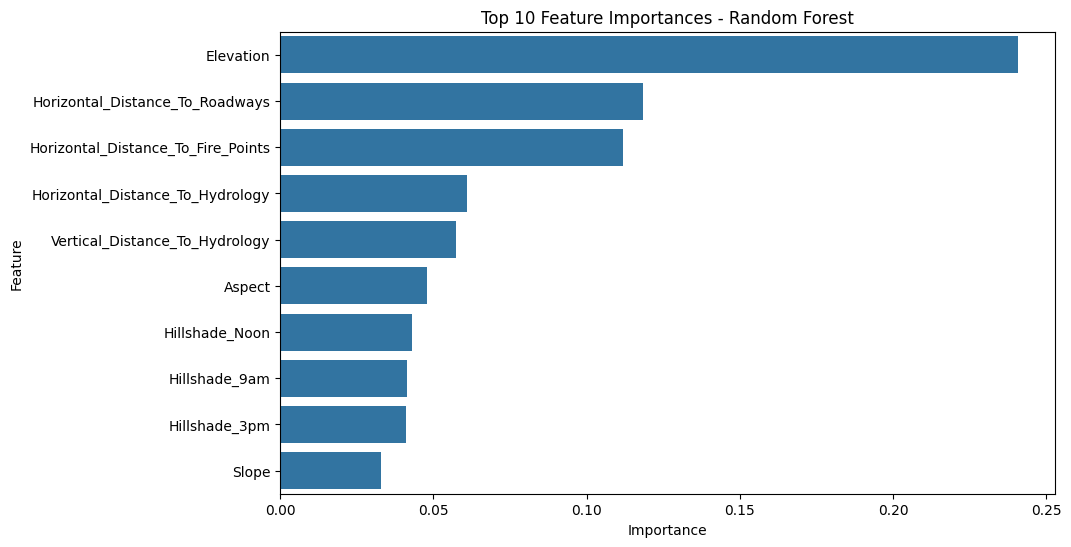

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_test, y_pred_rf))

feat_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feat_importance = feat_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance.head(10))
plt.title('Top 10 Feature Importances - Random Forest')
plt.show()

##Step 6: Compare Models and Hyperparameter Tuning (Bonus)
I trained an XGBoostClassifier for comparison and printed reports for both models. Tuned RandomForest with GridSearchCV on n_estimators and max_depth, applied the best model, and evaluated.

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Shift labels from [1, 2, 3, 4, 5, 6, 7] to [0, 1, 2, 3, 4, 5, 6]
y_train_shifted = y_train - 1
y_test_shifted = y_test - 1

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_shifted)
y_pred_xgb = xgb_model.predict(X_test)

# Adjust predictions back to original labels [1, 7] for reporting
y_pred_xgb_adjusted = y_pred_xgb + 1

# Print comparison (adjust y_test for reporting)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("XGBoost Report:\n", classification_report(y_test, y_pred_xgb_adjusted))

# Hyperparameter Tuning for Random Forest
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best RF Params:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
print("Tuned RF Report:\n", classification_report(y_test, y_pred_best_rf))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:10:14] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Random Forest Report:
               precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.93      0.90      0.92      3489
           7       0.97      0.96      0.97      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203

XGBoost Report:
               precision    recall  f1-score   support

           1       0.86      0.84      0.85     42557
           2       0.87      0.90      0.88     56500
           3       0.90      0.91      0.91      7121
           4       0.91      0.86      0.89       526
           5       0.89      0.59      0.71      1995
           6       0.85      0.82     